## https://github.com/khsio/project_kojak

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import datetime as dt
from scipy import stats
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import os
import gc

#### Project outline
The goal of my project is to perform a few tasks:

1. Analyze shopper behaviors (and maybe segmentation?)
2. Create shopping cart recommendation system for return customers (and maybe product bundles for profit maximization?)
3. Predict whether the customer would like to re-order an item that they have purchased before for their next purchase.
4. Flask app and demo that could show different product recommendation using different user accounts to sign in.Priority of task: 1 > 2 > 4 > 3

#### Dataset background
Instacart public dataset released in 2017 (https://www.instacart.com/datasets/grocery-shopping-2017)   
In Instacart medium post, they provided more info about the dataset and motivation on why Instacart released the dataset     (https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2).   

The dataset has more than 3M grocery orders for more than 200k Instacart customers.  
   
Data Dictionary could be found at https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b.
The data file comes with 6 csv files.   

 ### Load Data

In [2]:
# #Read dataset
# home_folder = 'C:/Users/mwamb/Desktop/Desktop/instacart/data/'
# #Read dataset
# aisles = pd.read_csv(home_folder + 'aisles.csv')
# departments = pd.read_csv(home_folder + 'departments.csv')
# order_products_prior = pd.read_csv(home_folder + 'order_products__prior.csv')
# order_products_train = pd.read_csv(home_folder + 'order_products__train.csv')
# orders = pd.read_csv(home_folder + 'orders.csv')
# products = pd.read_csv(home_folder + 'products.csv')

aisles = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/aisles.csv')
departments = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/departments.csv')
order_products_prior = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/order_products__prior.csv')
order_products_train = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/order_products__train.csv')
orders = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/orders.csv')
products = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/instacart/data/products.csv')

### Data dimension


In [3]:
# Check The Shape Of The Data Loaded
print('aisles shape: {} Rows, {} Columns'.format(*aisles.shape))
print('departments shape: {} Rows, {} Columns'.format(*departments.shape))

print('order_products_prior shape: {} Rows, {} Columns'.format(*order_products_prior.shape))
print('order_products_train shape: {} Rows, {} Columns'.format(*order_products_train.shape))

print('orders shape: {} Rows, {} Columns'.format(*orders.shape))
print('products shape: {} Rows, {} Columns'.format(*products.shape))

aisles shape: 134 Rows, 2 Columns
departments shape: 21 Rows, 2 Columns
order_products_prior shape: 603635 Rows, 4 Columns
order_products_train shape: 1384617 Rows, 4 Columns
orders shape: 3421083 Rows, 7 Columns
products shape: 49688 Rows, 4 Columns


### First five rows of Data

In [4]:
# Print First Few Rows Of The Data
display("aisles ")
display(aisles.head(5))
display("departments ")
display(departments.head(5))

display("order_products_prior ")
display(order_products_prior.head(5))
display("order_products_train ")
display(order_products_train.head(5))

display("orders ")
display(orders.head(5))
display("products  ")
display(products .head(5))

'aisles '

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


'departments '

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


'order_products_prior '

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


'order_products_train '

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


'orders '

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


'products  '

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### Description of the data


In [5]:
aisles.describe()


,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [6]:
departments.describe()


,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [7]:
order_products_prior.describe()


,order_id,product_id,add_to_cart_order,reordered
count,603635.000000,603635.000000,603635.000000,603635.000000
mean,31886.656972,25578.235251,8.348421,0.590743
std,18436.435140,14102.486658,7.157351,0.491697
min,2.000000,1.000000,1.000000,0.000000
25%,15900.500000,13517.000000,3.000000,0.000000
50%,31827.000000,25272.000000,6.000000,1.000000
75%,47921.000000,37923.000000,11.000000,1.000000
max,63810.000000,49688.000000,127.000000,1.000000


In [8]:
order_products_train.describe()


,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00


In [9]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [10]:
products.describe() 

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


### Structure of the data


In [11]:
##### Variable names of the data 
display("aisles")
display(aisles.columns)

display("departments")
display(departments.columns)

display("order_products_prior")
display(order_products_prior.columns)

display("order_products_train")
display(order_products_train.columns)

display("orders")
display(orders.columns)

display("products")
display(products.columns)

'aisles'

Index(['aisle_id', 'aisle'], dtype='object')

'departments'

Index(['department_id', 'department'], dtype='object')

'order_products_prior'

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

'order_products_train'

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

'orders'

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

'products'

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [12]:
##### type of columns 

# Number of each type of column
display("aisles")
display(aisles.dtypes.value_counts())

display("departments")
display(departments.dtypes.value_counts())

display("order_products_prior")
display(order_products_prior.dtypes.value_counts())

display("order_products_train")
display(order_products_train.dtypes.value_counts())

display("orders")
display(orders.dtypes.value_counts())

display("products")
display(products.dtypes.value_counts())

'aisles'

object    1
int64     1
dtype: int64

'departments'

object    1
int64     1
dtype: int64

'order_products_prior'

int64    4
dtype: int64

'order_products_train'

int64    4
dtype: int64

'orders'

int64      5
float64    1
object     1
dtype: int64

'products'

int64     3
object    1
dtype: int64

In [13]:
aisles.dtypes


aisle_id     int64
aisle       object
dtype: object

In [14]:
departments.dtypes


department_id     int64
department       object
dtype: object

In [15]:
order_products_prior.dtypes


order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [16]:
order_products_train.dtypes


order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [17]:
orders.dtypes


order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [18]:
products.dtypes


product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [19]:
productsOfRows = len(products.index)
print('Number of Rows in products : ' , productsOfRows)
print("Number of columns in products:", len(products.columns))
#aisles.aisle.unique()
#aisles['aisle'].value_counts()
products.nunique()


Number of Rows in products :  49688
Number of columns in products: 4


product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64

In [20]:
aislesOfRows = len(aisles.index)
print('Number of Rows in aisles : ' , aislesOfRows)
print("Number of columns in aisles:", len(aisles.columns))
#aisles.aisle.unique()
#aisles['aisle'].value_counts()
aisles.nunique()


Number of Rows in aisles :  134
Number of columns in aisles: 2


aisle_id    134
aisle       134
dtype: int64

In [21]:
departmentsOfRows = len(departments.index)
print('Number of Rows in dataframe : ' , departmentsOfRows)
print("Number of columns in departments:", len(departments.columns))
#departments['department'].value_counts()
departments.nunique()


Number of Rows in dataframe :  21
Number of columns in departments: 2


department_id    21
department       21
dtype: int64

In [22]:
order_products_priorsOfRows = len(order_products_prior.index)
print('Number of Rows in dataframe : ' , order_products_priorsOfRows)
print("Number of columns in order_products_prior:", len(order_products_prior.columns))

#order_products_prior['add_to_cart_order'].value_counts()

#order_products_prior.add_to_cart_order.unique()
#order_products_prior['reordered'].value_counts()
order_products_prior.nunique()


Number of Rows in dataframe :  603635
Number of columns in order_products_prior: 4


order_id             59905
product_id           30778
add_to_cart_order      127
reordered                2
dtype: int64

In [23]:
order_products_trainOfRows = len(order_products_train.index)
print('Number of Rows in dataframe : ' , order_products_trainOfRows)
print("Number of columns in order_products_train:", len(order_products_train.columns))
#order_products_train['reordered'].value_counts()
order_products_train.nunique()


Number of Rows in dataframe :  1384617
Number of columns in order_products_train: 4


order_id             131209
product_id            39123
add_to_cart_order        80
reordered                 2
dtype: int64

In [24]:
ordersOfRows = len(orders.index)
print('Number of Rows in dataframe : ' , ordersOfRows)
print("Number of columns in orders:", len(orders.columns))
#orders['reordered'].value_counts()
#orders['order_number'].value_counts()
#orders['user_id'].value_counts()
#orders['user_id'].nunique()
#orders['user_id'].count()
orders.nunique()


Number of Rows in dataframe :  3421083
Number of columns in orders: 7


order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [25]:
orders['eval_set'].value_counts()


prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [26]:

productsOfRows = len(products.index)
print('Number of Rows in dataframe : ' , productsOfRows)
print("Number of columns in products:", len(products.columns))

#products['product_name'].value_counts()
products.nunique()


Number of Rows in dataframe :  49688
Number of columns in products: 4


product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64

# File summary 

## aisles

Information regarding the aisle an item can be found (prepared soups/salad, speciality cheeses, etc.): 134 rows    

aisle_id: aisle identifier      
aisle: the name of the aisle


### departments

Information regarding the department an item can be found (frozen, bakery, etc.): 21 rows            

department_id: department identifier        
department: the name of the department

### product

Information regarding the product (product ID, which department/aisle it can be found): 49688 rows 


product_id: product identifier    
product_name: name of the product     
aisle_id: foreign key      
department_id: foreign key      

### order_products_prior

Data regarding orders that users previously purchased: 32434489 rows       


order_id: foreign key     
product_id: foreign key      
add_to_cart_order: order in which each product was added to cart     
reordered: 1 if this product has been ordered by this user in the past, 0 otherwise      


### order_products_train

Data regarding the last order for a user: 1384617 rows    

order_id             
product_id            
add_to_cart_order        
reordered                 



### orders

Information on the order each user put in, including the day of week, hour of day, and the number of days since previous order: 3421083 rows      

order_id: order identifier        
user_id: customer identifier     
eval_set: which evaluation set this order belongs in (prior, train, test)       
order_number: the order sequence number for this user (1 = first, n = nth)    
order_dow: the day of the week the order was placed on     
order_hour_of_day: the hour of the day the order was placed on     
days_since_prior: days since the last order, they are numbers form 1 t0 30  

# Merge

In [27]:
orders.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [28]:
products.head(2)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


In [29]:
#order_products_train.head(2)

In [30]:
order_products_prior.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


Merge order_products_prior and order products prior

In [31]:
result_product = pd.merge(products,
                 order_products_prior,
                 on='product_id')
result_product.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,1107,7,0
1,1,Chocolate Sandwich Cookies,61,19,5319,3,1
2,1,Chocolate Sandwich Cookies,61,19,7540,4,1
3,1,Chocolate Sandwich Cookies,61,19,9228,2,0
4,1,Chocolate Sandwich Cookies,61,19,9273,30,0


Merge result products and orders

In [32]:
final_result = pd.merge(result_product,
                 orders,
                 on='order_id')
final_result.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,1107,7,0,38259,prior,2,1,11,7.0
1,769,Sliced American Cheese,21,16,1107,10,0,38259,prior,2,1,11,7.0
2,6184,Clementines,32,4,1107,14,1,38259,prior,2,1,11,7.0
3,8048,Packaged Grape Tomatoes,32,4,1107,15,1,38259,prior,2,1,11,7.0
4,9007,Frosted Flakes,121,14,1107,17,0,38259,prior,2,1,11,7.0


In [33]:
print(orders.shape)
print('there are', len(orders[orders.eval_set == 'prior']), 'entries for prior')
print('there are', len(orders[orders.eval_set == 'train']), 'entries for train')
print('there are', len(orders[orders.eval_set == 'test']), 'entries for test')

(3421083, 7)
there are 3214874 entries for prior
there are 131209 entries for train
there are 75000 entries for test


. there are 3221083 orders in total  
. there are 3214874 orders that are prior  
. there are 131209 orders that are in train set  
. there are 75000 orders that are in test set   

In [34]:
print('there are', len(orders[orders.eval_set == 'prior'].user_id.unique()), 'unique customers in total')
print('there are', len(orders[orders.eval_set == 'train'].user_id.unique()), 'unique customers in train set')
print('there are', len(orders[orders.eval_set == 'test'].user_id.unique()), 'unique customers in test set')

there are 206209 unique customers in total
there are 131209 unique customers in train set
there are 75000 unique customers in test set



since one user could have multiple orders, so I'm interested to see how many unique customer in the dataset  
 
. there are 206209 unique customer in total, which match the description in data dictionary  
. there are 131209 customers in the train set  
. there are 75000 customers in the test set  

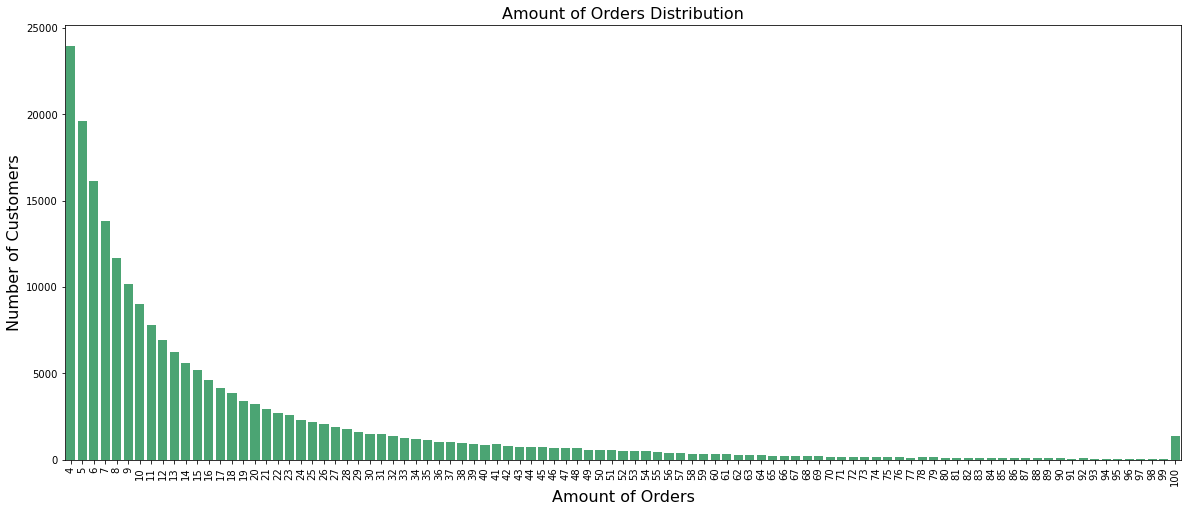

In [35]:

orders_amount_for_customer = orders.groupby('user_id')['order_number'].count().value_counts()

plt.figure(figsize=(20,8))
sns.barplot(x=orders_amount_for_customer.index, y=orders_amount_for_customer.values, color='mediumseagreen')
plt.title('Amount of Orders Distribution', fontsize=16)
plt.ylabel('Number of Customers', fontsize=16)
plt.xlabel('Amount of Orders', fontsize=16)
plt.xticks(rotation='vertical');

The amount of orders for each customers are between 4 to 100, which match the description in the data dictionary



In [36]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [37]:
days = orders.order_dow.values.tolist()
def get_day():
    res = []
    for day in days:
        if day == 0:
            res.append('Sun')
        elif day == 1:
            res.append('Mon')
        elif day == 2:
            res.append('Tue')
        elif day == 3:
            res.append('Wed')
        elif day == 4:
            res.append("Thur")
        elif day == 5:
            res.append('Fri')
        elif day == 6:
            res.append('Sat')
    return res

In [38]:
z = orders.copy()

In [39]:
z['order_dayofweek'] = get_day()


In [40]:
z.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_dayofweek
0,2539329,1,prior,1,2,8,NaN,Tue
1,2398795,1,prior,2,3,7,15.0,Wed
2,473747,1,prior,3,3,12,21.0,Wed
3,2254736,1,prior,4,4,7,29.0,Thur
4,431534,1,prior,5,4,15,28.0,Thur


''

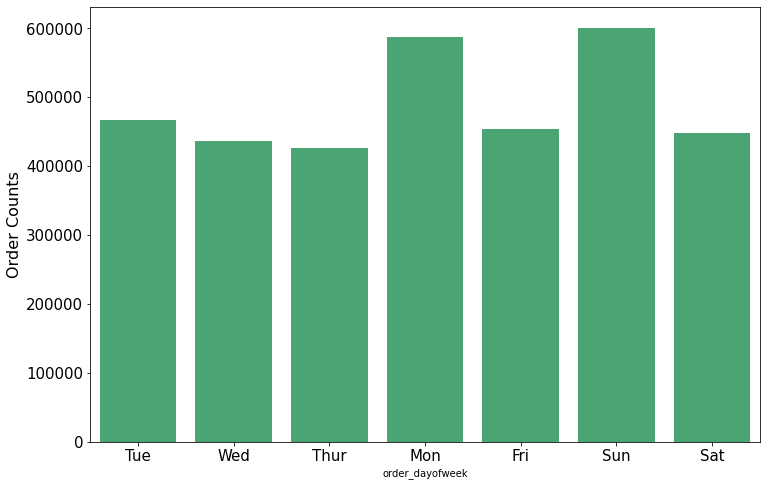

In [41]:
plt.figure(figsize=(12,8))
sns.countplot(x=z.order_dayofweek, color='mediumseagreen')

#plt.title("Order Amounts by Days", fontsize=16)
#plt.xlabel('Day of Week', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)
;

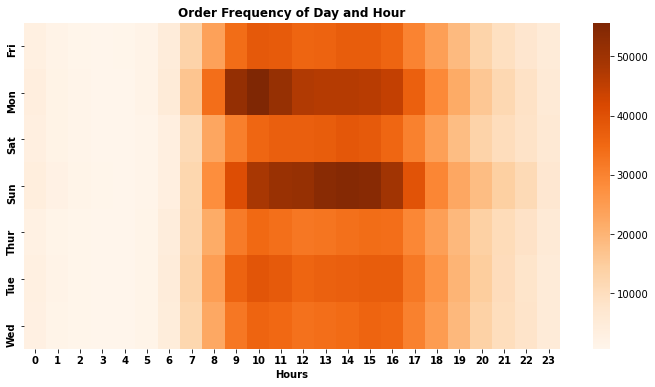

In [43]:
#Heatmap of Frequency or Order Based on Days & Hours
grouped_df = z.groupby(["order_dayofweek", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dayofweek', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df,cmap="Oranges")
plt.title("Order Frequency of Day and Hour",weight="bold")
plt.ylabel("")
plt.xlabel("Hours",weight="bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

In [44]:

#converting number of day to name

z["order_dow"] = z["order_dow"].apply(lambda x:"Sunday" if x==0 else x)
z["order_dow"] = z["order_dow"].apply(lambda x:"Monday" if x==1 else x)
z["order_dow"] = z["order_dow"].apply(lambda x:"Tuesday" if x==2 else x)
z["order_dow"] = z["order_dow"].apply(lambda x:"Wednesday" if x==3 else x)
z["order_dow"] = z["order_dow"].apply(lambda x:"Thursday" if x==4 else x)
z["order_dow"] = z["order_dow"].apply(lambda x:"Friday" if x==5 else x)
z["order_dow"] = z["order_dow"].apply(lambda x:"Saturday" if x==6 else x)

In [45]:
z.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_dayofweek
0,2539329,1,prior,1,Tuesday,8,NaN,Tue
1,2398795,1,prior,2,Wednesday,7,15.0,Wed
2,473747,1,prior,3,Wednesday,12,21.0,Wed
3,2254736,1,prior,4,Thursday,7,29.0,Thur
4,431534,1,prior,5,Thursday,15,28.0,Thur


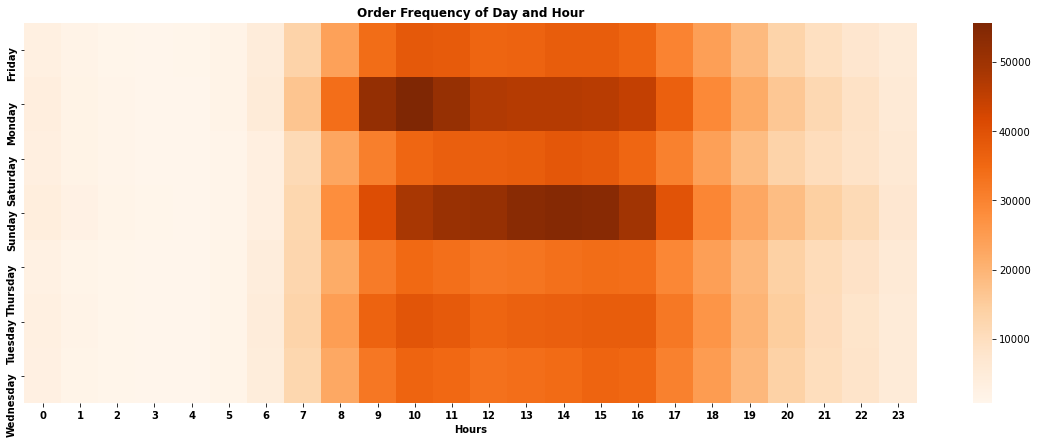

In [54]:

#Heatmap of Frequency or Order Based on Days & Hours
grouped_df = z.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(20,7))
sns.heatmap(grouped_df,cmap="Oranges")
plt.title("Order Frequency of Day and Hour",weight="bold")
plt.ylabel("")
plt.xlabel("Hours",weight="bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

''

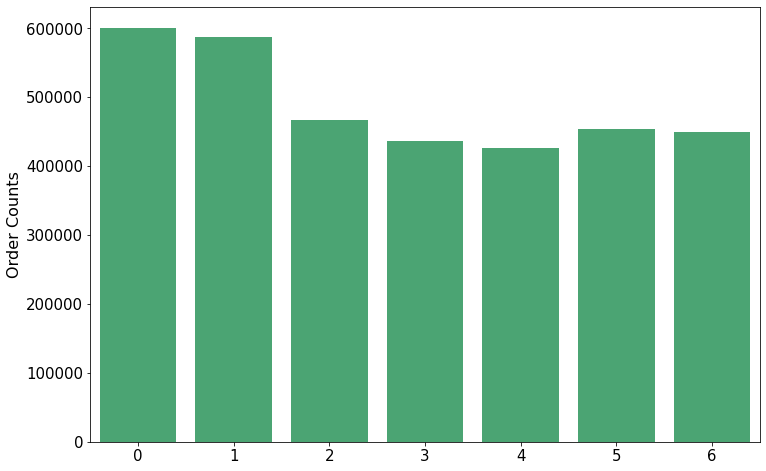

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(x=orders.order_dow, color='mediumseagreen')

#plt.title("Order Amounts by Days", fontsize=16)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)
;


0 and 1 has the most orders in a week, while 4 has the least  
not sure which day of week is corresponding to a number, maybe 0 is Sun and 6 is Sat?  

''

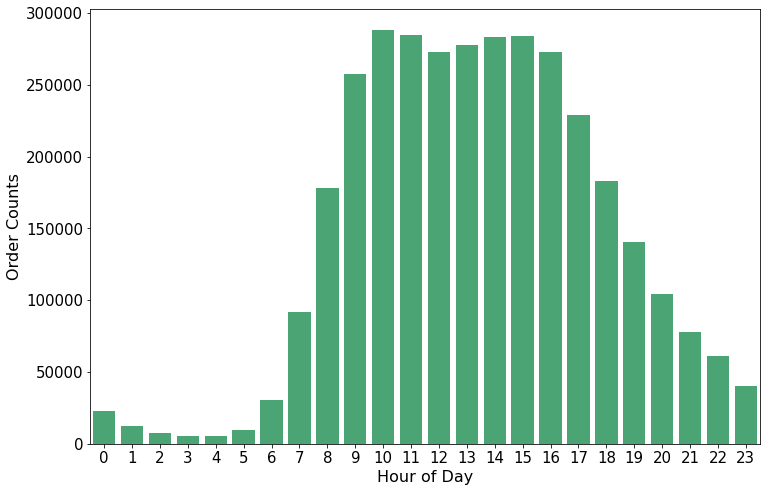

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(x=orders.order_hour_of_day, color='mediumseagreen')

#plt.title("Order Amounts by Hours", fontsize=16)
plt.xlabel('Hour of Day', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)
;

Looks like people like to order between 8am to 6pm, couldn't find the what the number corresponding to in data dictionary


''

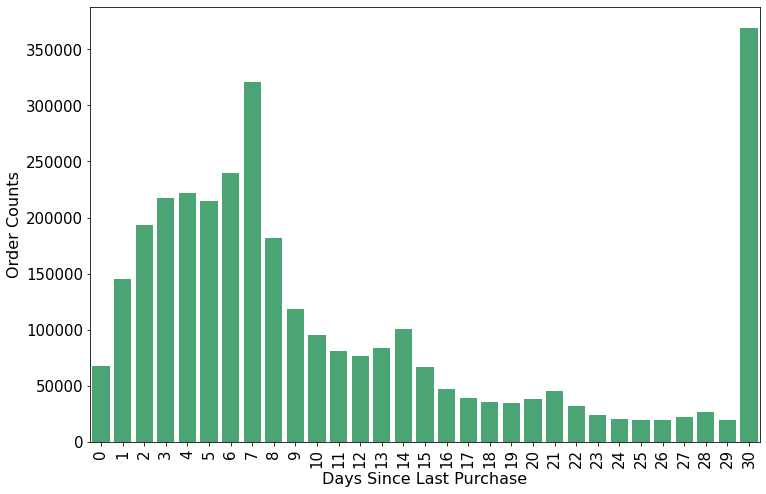

In [44]:
plt.figure(figsize=(12,8))
sns.countplot(x=orders.days_since_prior_order, color= 'mediumseagreen')

#plt.title("Number of Orders per Days Since Last Purchase", fontsize=16)
plt.xlabel('Days Since Last Purchase', fontsize=16)
plt.xticks(np.arange(31), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                          24, 25, 26, 27, 28, 29, 30],  fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Order Counts', fontsize=16)
plt.yticks(fontsize=15)
;

  looks like majority people order once a week, between 0 to 7.   
  and there are people who order once more than 30 days. 

### Explore more on order_product_prior & order_product_train


In [45]:
order_products_prior.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [46]:
order_products_train.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [47]:
print(order_products_prior.shape)
print(order_products_train.shape)

(603635, 4)
(1384617, 4)


In [48]:
order_products_total = pd.concat([order_products_prior, order_products_train])

print(order_products_total.shape)

(1988252, 4)


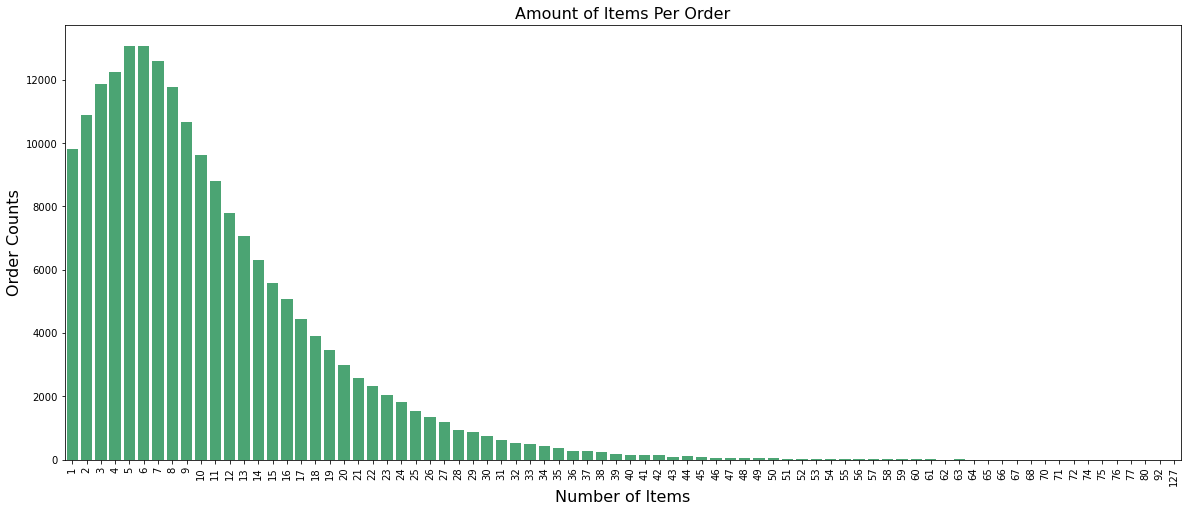

In [49]:

frequency_per_number_of_order = order_products_total.groupby('order_id')['product_id'].count().value_counts()

plt.figure(figsize=(20,8))
sns.barplot(x=frequency_per_number_of_order.index, y=frequency_per_number_of_order.values, color='mediumseagreen')
plt.title('Amount of Items Per Order', fontsize=16)
plt.ylabel('Order Counts', fontsize=16)
plt.xlabel('Number of Items', fontsize=16)
plt.xticks(rotation='vertical');

. looks like people msotly purchase 4 items per order  
. looks like majority people like to purchase between 3 to 8 items per order   

In [50]:
print('there are', order_products_total.shape[0], 'grocery products ordered')
print('there are', len(order_products_total.order_id.unique()), 'order transactions')
print('there are', len(order_products_total.product_id.unique()), 'unique products')

there are 1988252 grocery products ordered
there are 191114 order transactions
there are 41514 unique products


In [51]:
print(len(order_products_total[order_products_total.reordered == 1])/order_products_total.shape[0], 'have reordered before')
print(len(order_products_total[order_products_total.reordered == 0])/order_products_total.shape[0], 'haven\'t reordered before')

0.5962106413070375 have reordered before
0.40378935869296245 haven't reordered before


In [52]:
print(len(order_products_total[order_products_total.reordered == 1]), 'products have reordered before')
print(len(order_products_total[order_products_total.reordered == 0]), 'products haven\'t reordered before')

1185417 products have reordered before
802835 products haven't reordered before


### Explore more on aisles, departments & products

In [53]:
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [54]:
departments.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [55]:
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [56]:
print(aisles.shape)
print(departments.shape)
print(products.shape)

(134, 2)
(21, 2)
(49688, 4)


In [57]:
products_departments = products.merge(departments, left_on='department_id', right_on='department_id', how='left')
products_departments_aisles = products_departments.merge(aisles, left_on='aisle_id', right_on='aisle_id', how='left')
products_departments_aisles.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [58]:
products_departments_aisles.groupby('department')['product_id'].count().reset_index().sort_values(by='product_id', ascending=False).head(10)

,department,product_id
17,personal care,6563
20,snacks,6264
16,pantry,5371
3,beverages,4365
10,frozen,4007
7,dairy eggs,3449
11,household,3085
6,canned goods,2092
9,dry goods pasta,1858
19,produce,1684


### Explore more on products_departments_aisles & order_products_total

In [59]:
order_products_total.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [60]:
products_departments_aisles.head()


,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [61]:
df = order_products_total.merge(products_departments_aisles, left_on='product_id', right_on='product_id', how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


In [62]:
df.shape


(1988252, 9)

In [63]:

top_15_products = df.product_name.value_counts(ascending=False).reset_index().head(15)
top_15_products.columns = ['product_name', 'count']
top_15_products

,product_name,count
0,Banana,27645
1,Bag of Organic Bananas,22623
2,Organic Strawberries,15787
3,Organic Baby Spinach,14326
4,Organic Hass Avocado,11282
5,Large Lemon,10984
6,Organic Avocado,10630
7,Strawberries,9145
8,Limes,8603
9,Organic Raspberries,8148


. the top 15 items that people purchase the most are above.  
. most of them are organic fruits/veggies. all of them are fruits/veggies

In [64]:
top_15_aisles = df.aisle.value_counts(ascending=False).reset_index().head(15)
top_15_aisles.columns = ['aisle_name', 'count']
top_15_aisles

,aisle_name,count
0,fresh fruits,218389
1,fresh vegetables,213885
2,packaged vegetables fruits,111490
3,yogurt,82248
4,packaged cheese,59849
5,water seltzer sparkling water,52145
6,milk,49263
7,chips pretzels,44597
8,soy lactosefree,38408
9,bread,34679


In [65]:
top_15_department = df.department.value_counts(ascending=False).reset_index().head(15)
top_15_department.columns = ['department_name', 'count']
top_15_department

,department_name,count
0,produce,585108
1,dairy eggs,318192
2,snacks,172689
3,beverages,164339
4,frozen,142224
5,pantry,115843
6,bakery,70325
7,canned goods,66574
8,deli,63896
9,dry goods pasta,54474


In [66]:

df.groupby('department')

In [67]:

reorder_ratio_per_dep = df.groupby('department')['reordered'].mean().reset_index()
reorder_ratio_per_dep.columns = ['department', 'reorder_ratio']
reorder_ratio_per_dep.sort_values(by='reorder_ratio', ascending=False)

,department,reorder_ratio
7,dairy eggs,0.673468
19,produce,0.660581
3,beverages,0.656071
2,bakery,0.635009
18,pets,0.625654
8,deli,0.614843
0,alcohol,0.595579
13,meat seafood,0.582609
20,snacks,0.578983
5,bulk,0.577204


''

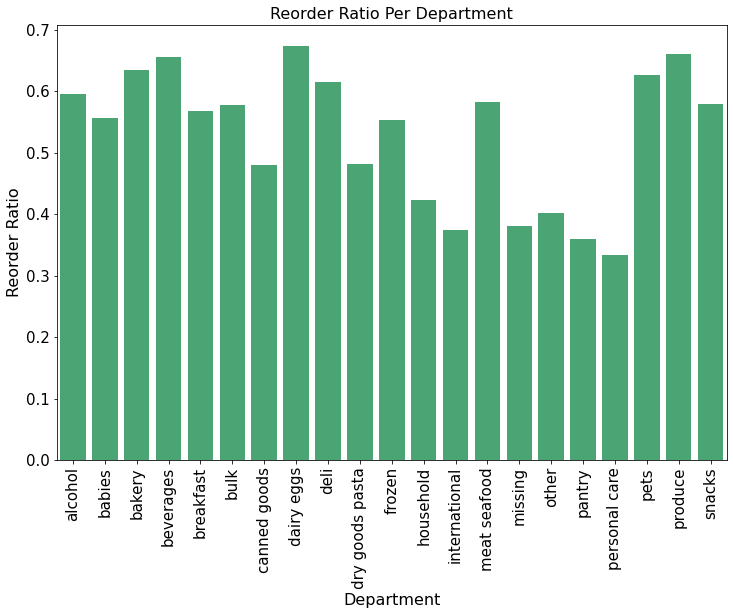

In [68]:
plt.figure(figsize=(12,8))
sns.barplot(x=reorder_ratio_per_dep.department, y=reorder_ratio_per_dep.reorder_ratio, color='mediumseagreen')
plt.title('Reorder Ratio Per Department', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.xticks(fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Reorder Ratio', fontsize=16)
plt.yticks(fontsize=15)
;

. dairy eggs has the most reorder ratio  
. personal care has the least reorder ratio

In [69]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


In [70]:
reorder_ratio_per_aisle = df.groupby('aisle')['reordered'].mean().reset_index()
reorder_ratio_per_aisle.columns = ['aisle', 'reorder_ratio']
reorder_ratio_per_aisle.sort_values(by='reorder_ratio', ascending=False)

,aisle,reorder_ratio
83,milk,0.788056
131,water seltzer sparkling water,0.734394
50,fresh fruits,0.731182
41,eggs,0.724388
96,packaged produce,0.711178
...,...,...
8,beauty,0.219072
47,first aid,0.207756
76,kitchen supplies,0.186667
7,baking supplies decor,0.167669


. milk aisle has the highest reorder ratio  
. spices seasonings has the least reorder ratio

In [71]:
top_15_reorder_items = df.groupby('product_name')['reordered'].sum().reset_index().sort_values(by='reordered', ascending=False).head(15)
top_15_reorder_items

,product_name,reordered
3029,Banana,24049
2850,Bag of Organic Bananas,19282
26698,Organic Strawberries,12388
23938,Organic Baby Spinach,11588
25238,Organic Hass Avocado,9204
23905,Organic Avocado,8708
18589,Large Lemon,7884
35903,Strawberries,6643
27197,Organic Whole Milk,6267
26199,Organic Raspberries,6240


In [72]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


In [73]:
add_to_cart_order_reordered_ratio = df.groupby('add_to_cart_order')['reordered'].mean().reset_index()
add_to_cart_order_reordered_ratio.head()

,add_to_cart_order,reordered
0,1,0.708441
1,2,0.692609
2,3,0.665882
3,4,0.645630
4,5,0.620856


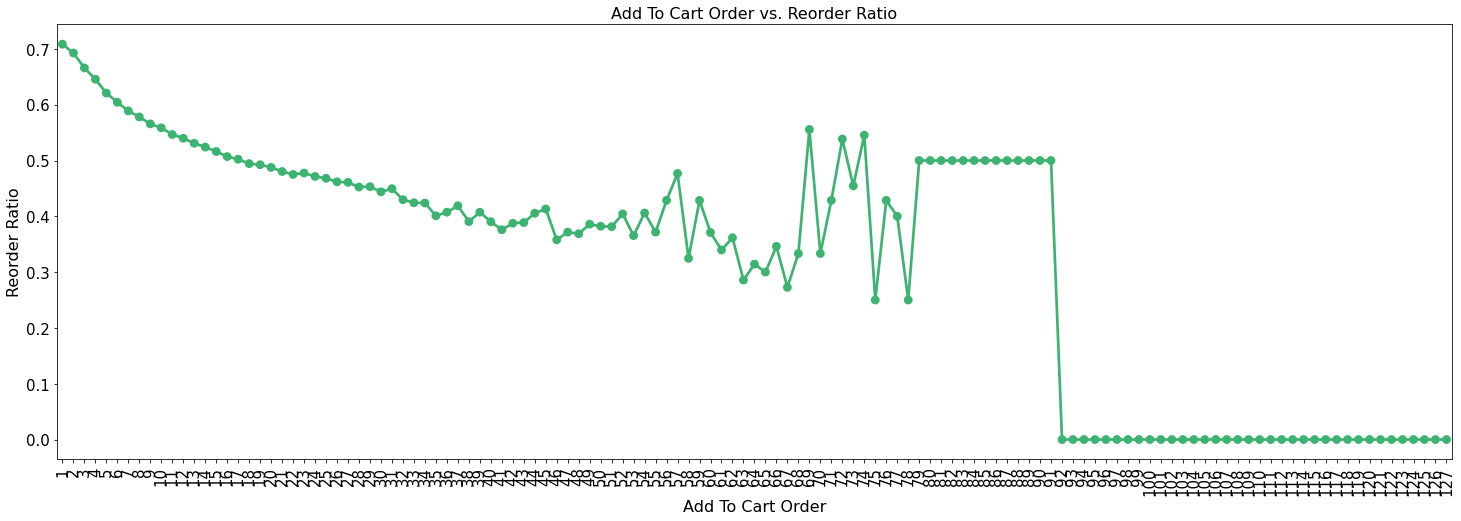

In [74]:
plt.figure(figsize=(25,8))
sns.pointplot(add_to_cart_order_reordered_ratio.add_to_cart_order, add_to_cart_order_reordered_ratio.reordered, color='mediumseagreen')
plt.title('Add To Cart Order vs. Reorder Ratio', fontsize=16)
plt.xlabel('Add To Cart Order', fontsize=16)
plt.xticks(fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Reorder Ratio', fontsize=16)
plt.yticks(fontsize=15);


### looking what items are ordered before noon, and what items are ordered after noon

In [75]:
# remove any rows referring to the test set
df_orders = orders[orders.eval_set != 'test']

# drop the eval_set column
df_orders = df_orders.drop(['eval_set'], axis=1)

# concatenate the _prior and _train datasets
df_order_products = pd.concat([order_products_prior, order_products_train])

# expand every order_id with the list of product_ids in that order_id
temp = df_orders.merge(df_order_products, on='order_id')
temp.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,11,4,8,14.0,196,1,1
1,1187899,1,11,4,8,14.0,25133,2,1
2,1187899,1,11,4,8,14.0,38928,3,1
3,1187899,1,11,4,8,14.0,26405,4,1
4,1187899,1,11,4,8,14.0,39657,5,1


In [76]:
## Keep only the top 2000 products
top_products = pd.DataFrame({'total_count': temp.groupby('product_id').size()}).sort_values('total_count', ascending=False).reset_index()[:2000]
top_products = top_products.merge(products, on='product_id')
top_products.head()

,product_id,total_count,product_name,aisle_id,department_id
0,24852,27645,Banana,24,4
1,13176,22623,Bag of Organic Bananas,24,4
2,21137,15787,Organic Strawberries,24,4
3,21903,14326,Organic Baby Spinach,123,4
4,47209,11282,Organic Hass Avocado,24,4


In [77]:
# keep only observations that have products in top_products
temp = temp.loc[temp['product_id'].isin(top_products.product_id)]

In [78]:

product_orders_by_hour = pd.DataFrame({'count': temp.groupby(['product_id', 'order_hour_of_day']).size()}).reset_index()
product_orders_by_hour['pct'] = product_orders_by_hour.groupby('product_id')['count'].apply(lambda x: x/x.sum()*100)
product_orders_by_hour.head(24)

,product_id,order_hour_of_day,count,pct
0,34,0,2,0.540541
1,34,1,1,0.270270
2,34,5,1,0.270270
3,34,6,5,1.351351
4,34,7,8,2.162162
5,34,8,19,5.135135
6,34,9,23,6.216216
7,34,10,35,9.459459
8,34,11,27,7.297297
9,34,12,30,8.108108


In [79]:
mean_hour = pd.DataFrame({'mean_hour': product_orders_by_hour.groupby('product_id').apply(lambda x: sum(x['order_hour_of_day'] * x['count'])/sum(x['count']))}).reset_index()
mean_hour.head()

,product_id,mean_hour
0,34,13.505405
1,45,13.257316
2,79,13.411067
3,116,12.211382
4,117,13.803191


In [80]:
morning = mean_hour.sort_values('mean_hour')[:25]
morning = morning.merge(products, on='product_id')
morning.head()

,product_id,mean_hour,product_name,aisle_id,department_id
0,13575,12.007519,Apples,24,4
1,45051,12.008511,Pub Mix,107,19
2,33081,12.054167,Chicken Apple Sausage,106,12
3,46061,12.112745,Popcorn,23,19
4,42500,12.128514,Orange & Lemon Flavor Variety Pack Sparkling F...,77,7


In [81]:
afternoon = mean_hour.sort_values('mean_hour', ascending=False)[:25]
afternoon = afternoon.merge(products, on='product_id')
afternoon.head()

,product_id,mean_hour,product_name,aisle_id,department_id
0,45541,14.732719,The Tonight Dough™ Ice Cream,37,1
1,11281,14.677130,Double Stuf Oreo Sandwich Cookies,61,19
2,41007,14.593407,Toffee & Sea Salt Milk Chocolate Bar,45,19
3,38374,14.592715,Milk and Cookies Ice Cream,37,1
4,30668,14.572973,Half Baked Frozen Yogurt,37,1


In [82]:
morning_pct = product_orders_by_hour.merge(morning, on='product_id').sort_values(['mean_hour', 'order_hour_of_day'])
afternoon_pct = product_orders_by_hour.merge(afternoon, on='product_id').sort_values(['mean_hour', 'order_hour_of_day'], ascending=False)

In [83]:
# get list of morning and afteroon product names
morning_product_names = list(morning_pct['product_name'].unique())
morning_product_names = '\n'.join(morning_product_names)
afternoon_product_names = list(afternoon_pct['product_name'].unique())
afternoon_product_names = '\n'.join(afternoon_product_names)

# hack to remove 'Variety Pack' from Orange & Lemon Flavor Variety Pack Sparkling Fruit Beverage
morning_product_names = morning_product_names.replace('Variety Pack ', '')

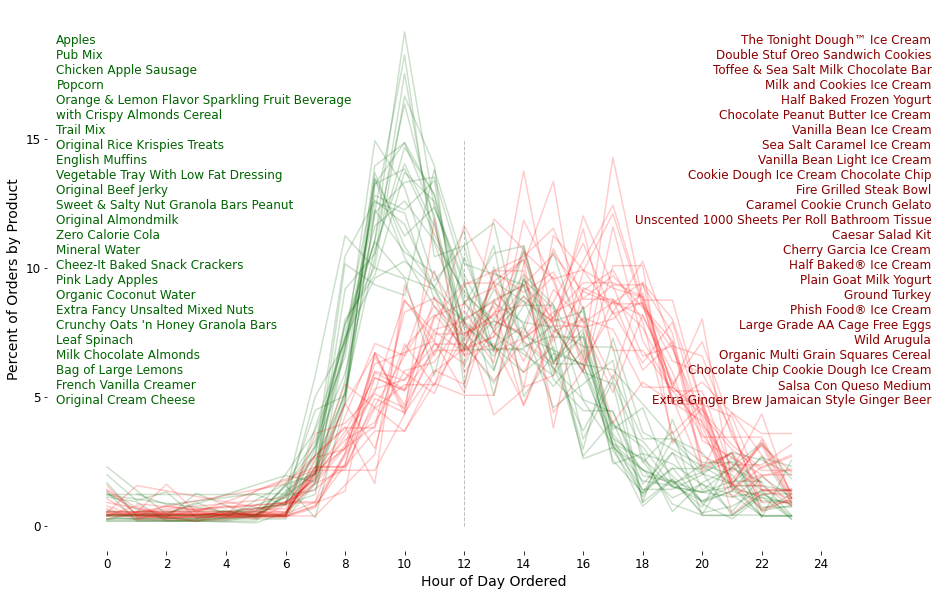

In [84]:
# Figure Size
fig, ax = plt.subplots(figsize=(16, 10))

# Plot
morning_pct.groupby('product_id').plot(x='order_hour_of_day', 
                                       y='pct', 
                                       ax=ax, 
                                       legend=False,
                                       alpha=0.2,
                                       aa=True,
                                       color='darkgreen',
                                       linewidth=1.5,)
afternoon_pct.groupby('product_id').plot(x='order_hour_of_day', 
                                         y='pct', 
                                         ax=ax, 
                                         legend=False,
                                         alpha=0.2,
                                         aa=True,
                                         color='red',
                                         linewidth=1.5,)

# Aesthetics
# Margins
plt.margins(x=0.5, y=0.05)

# Hide spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Labels
label_font_size = 14
plt.xlabel('Hour of Day Ordered', fontsize=label_font_size)
plt.ylabel('Percent of Orders by Product', fontsize=label_font_size)

# Tick Range
tick_font_size = 12
ax.tick_params(labelsize=tick_font_size)
plt.xticks(range(0, 25, 2))
plt.yticks(range(0, 16, 5))
plt.xlim([-2, 28])

# Vertical line at noon
plt.vlines(x=12, ymin=0, ymax=15, alpha=0.5, color='gray', linestyle='dashed', linewidth=1.0)

# Text
text_font_size = 12
ax.text(0.01, 0.95, morning_product_names,
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='darkgreen', fontsize=text_font_size)
ax.text(0.99, 0.95, afternoon_product_names,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='darkred', fontsize=text_font_size);

In [90]:
z.corr()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,1.000000,-0.000165,-0.000098,0.000929,-0.000019,0.000523
user_id,-0.000165,1.000000,-0.001424,-0.001205,-0.001007,0.001591
order_number,-0.000098,-0.001424,1.000000,0.015258,-0.035690,-0.360564
order_dow,0.000929,-0.001205,0.015258,1.000000,0.005978,-0.028107
order_hour_of_day,-0.000019,-0.001007,-0.035690,0.005978,1.000000,0.001291
days_since_prior_order,0.000523,0.001591,-0.360564,-0.028107,0.001291,1.000000


In [93]:
z.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_dayofweek
0,2539329,1,prior,1,2,8,NaN,Tue
1,2398795,1,prior,2,3,7,15.0,Wed
2,473747,1,prior,3,3,12,21.0,Wed
3,2254736,1,prior,4,4,7,29.0,Thur
4,431534,1,prior,5,4,15,28.0,Thur


### Correlation matrix heatmap between, order_dayofweek order_hour_of_day

### Network graphs

https://medium.com/@szabo.bibor